In [ ]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/IRIS (1).csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# print the first 5 rows of the dataframe
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# data shpae
df.shape

(150, 5)

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# Summary Statistics
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='sepal_length', ylabel='Count'>

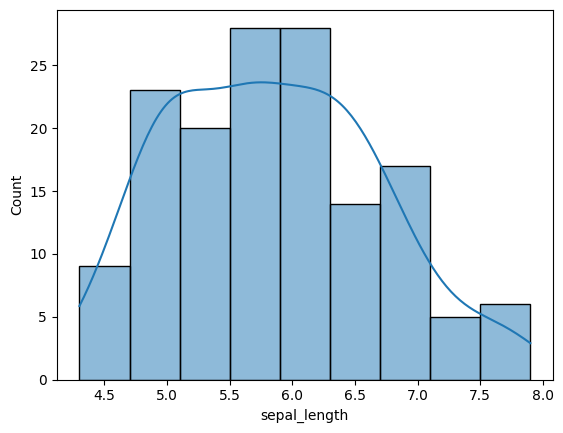

In [ ]:
# draw a histogram to see the distribution of sepal_length column
sns.histplot(df['sepal_length'], kde=True)

Mean: 5.843333333333334
Median: 5.8
Mode: 5.0


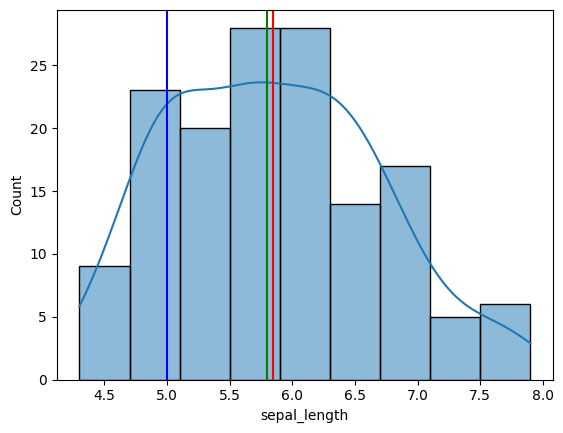

In [ ]:
sns.histplot(df['sepal_length'], kde=True)
plt.axvline(df['sepal_length'].mean(), color='red')
plt.axvline(df['sepal_length'].median(), color='green')
plt.axvline(df['sepal_length'].mode()[0], color='blue')

# print the value of mean, median and mode of sepal_length column
print('Mean:', df['sepal_length'].mean())
print('Median:', df['sepal_length'].median())
print('Mode:', df['sepal_length'].mode()[0])

In [ ]:
le_species = LabelEncoder()
df['species'] = le_species.fit_transform(df['species'])

In [ ]:
# import the scalar
scalar = MinMaxScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0


In [ ]:
# decode the object column
df['species'] = le_species.inverse_transform(df['species'])

<Axes: xlabel='petal_length', ylabel='Count'>

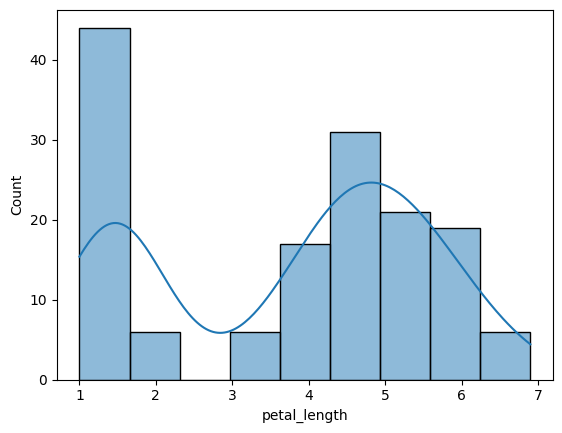

In [ ]:
# draw a histogram to see the distribution of petal_length column
sns.histplot(df['petal_length'], kde=True)

In [ ]:
# make box plots of all the numeric columns using for loop and plotly
fig = px.box(data_frame=df, y='sepal_length')
fig.show()

fig = px.box(data_frame=df, y='sepal_width')
fig.show()

fig = px.box(data_frame=df, y='petal_length')
fig.show()

fig = px.box(data_frame=df, y='petal_width')
fig.show()

In [ ]:
# Calculate the IQR
q1 = df['sepal_width'].quantile(0.25)
q3 = df['sepal_width'].quantile(0.75)
iqr = q3 - q1

# Calculate the LOF and UFO
lof = q1 - 1.5 * iqr
ufo = q3 + 1.5 * iqr
print(lof)
print(ufo)
# Identify the outliers
outliers1 = df[df['sepal_width'] < lof]
outliers2 = df[df['sepal_width'] > ufo]

2.05
4.05


In [ ]:
# Combine the outliers using concat
outliers = pd.concat([outliers1, outliers2])

# Print the outliers
print(outliers)

    sepal_length  sepal_width  petal_length  petal_width          species
60           5.0          2.0           3.5          1.0  Iris-versicolor
15           5.7          4.4           1.5          0.4      Iris-setosa
32           5.2          4.1           1.5          0.1      Iris-setosa
33           5.5          4.2           1.4          0.2      Iris-setosa


In [ ]:
X = df.drop('species', axis=1)
y = df['species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline


# Create a pipeline for each model
pipeline = Pipeline([
    ('model', model)
    ])

# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5)

# Calculate mean accuracy
mean_accuracy = scores.mean()

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Model:", RandomForestClassifier())
print("Cross-validation Accuracy:", mean_accuracy)
print("Test Accuracy:", accuracy)

best_model = pipeline

# save the best model
import pickle
pickle.dump(best_model, open('iris_model.dot', 'wb'))

Model: RandomForestClassifier()
Cross-validation Accuracy: 0.9416666666666667
Test Accuracy: 1.0
